In [62]:
import pickle
import torch
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
from analysis import *

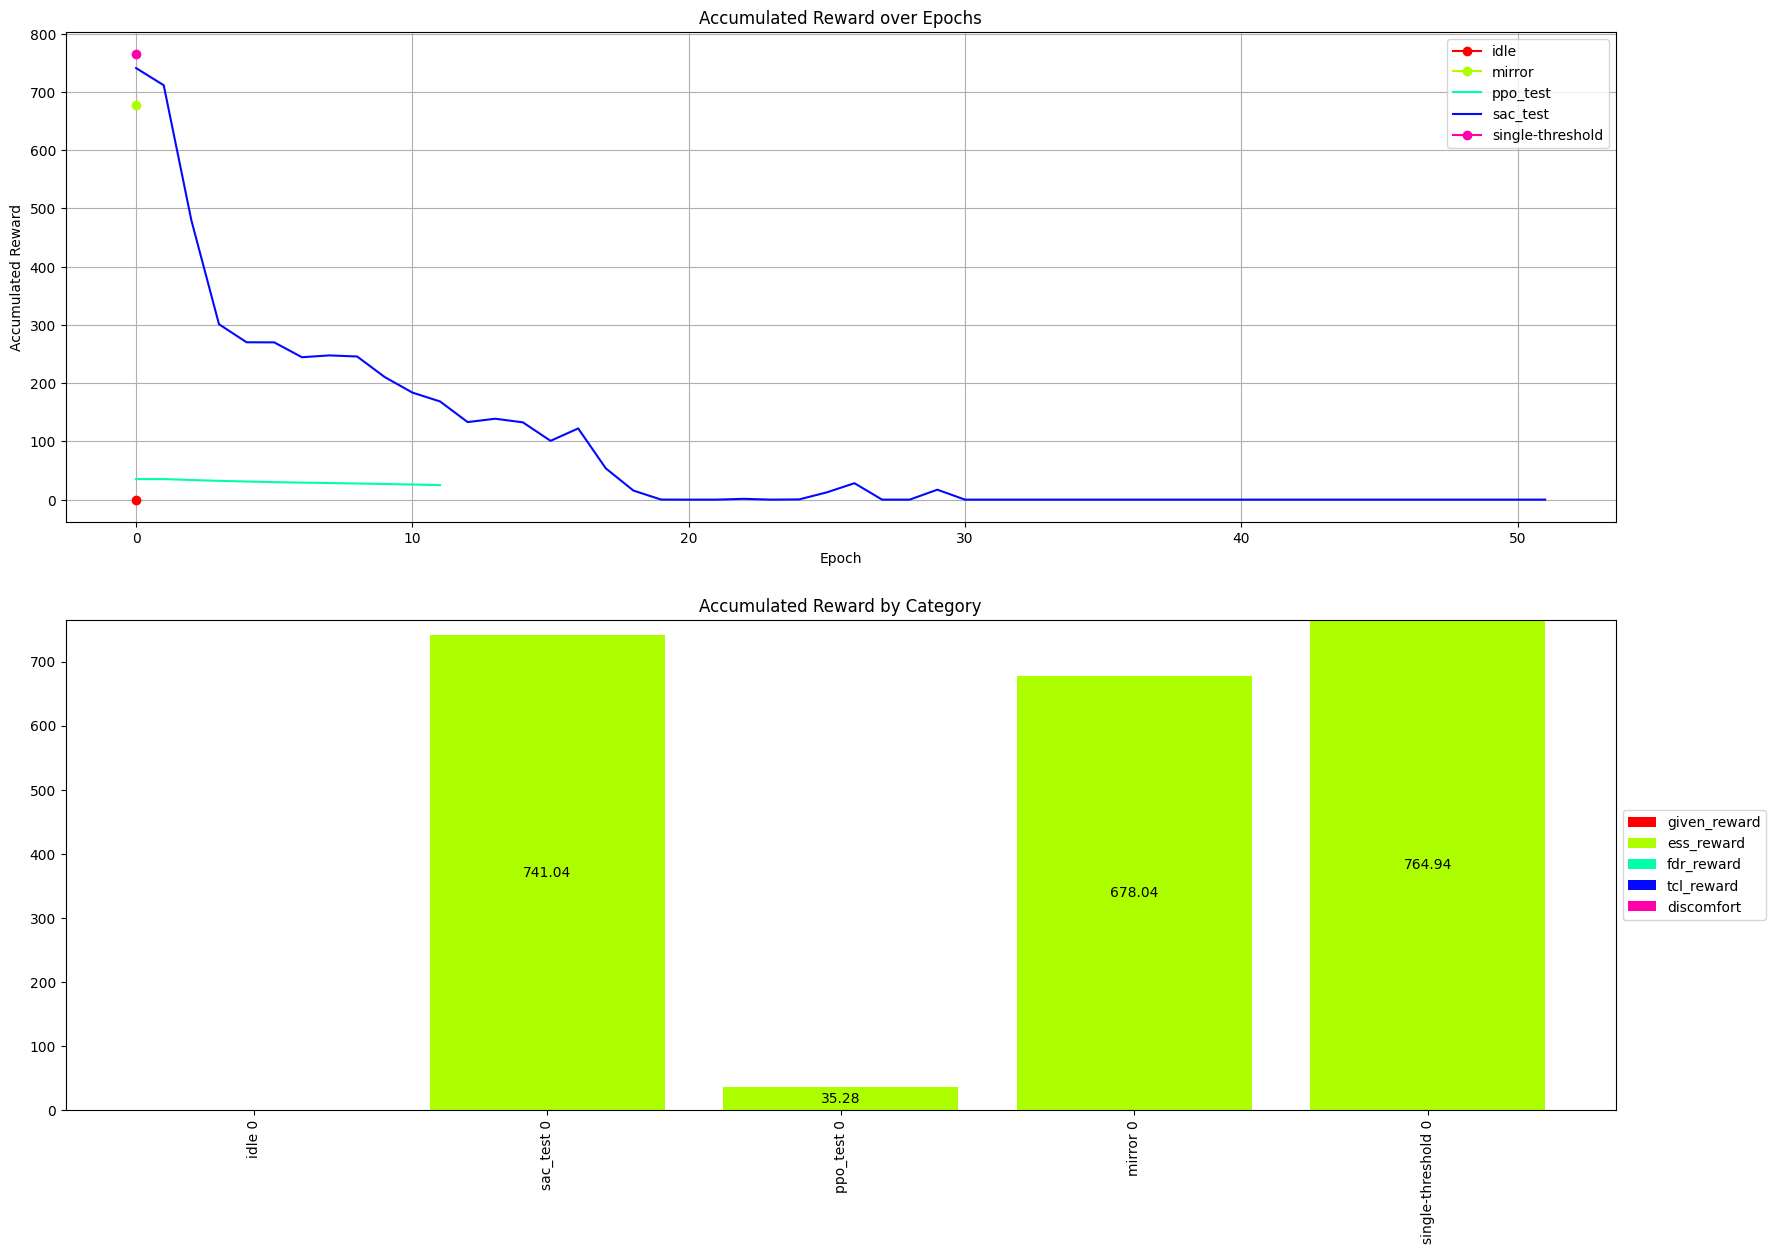

In [117]:
data_dict = overview(path="./logs/ess/")

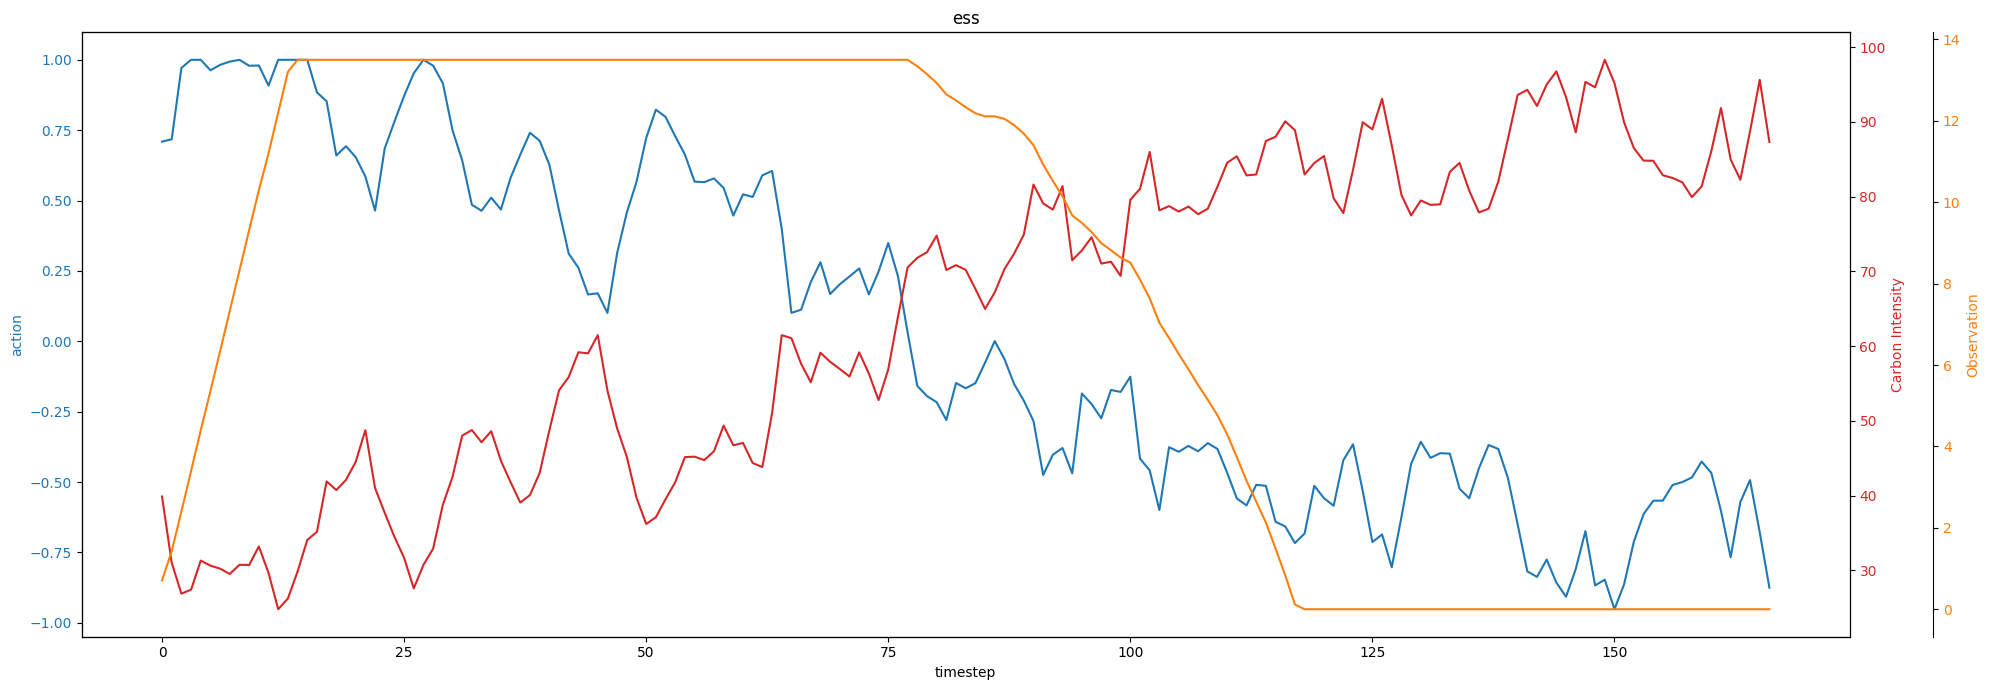

In [119]:
deep_dive(data_dict["mirror"], 0)

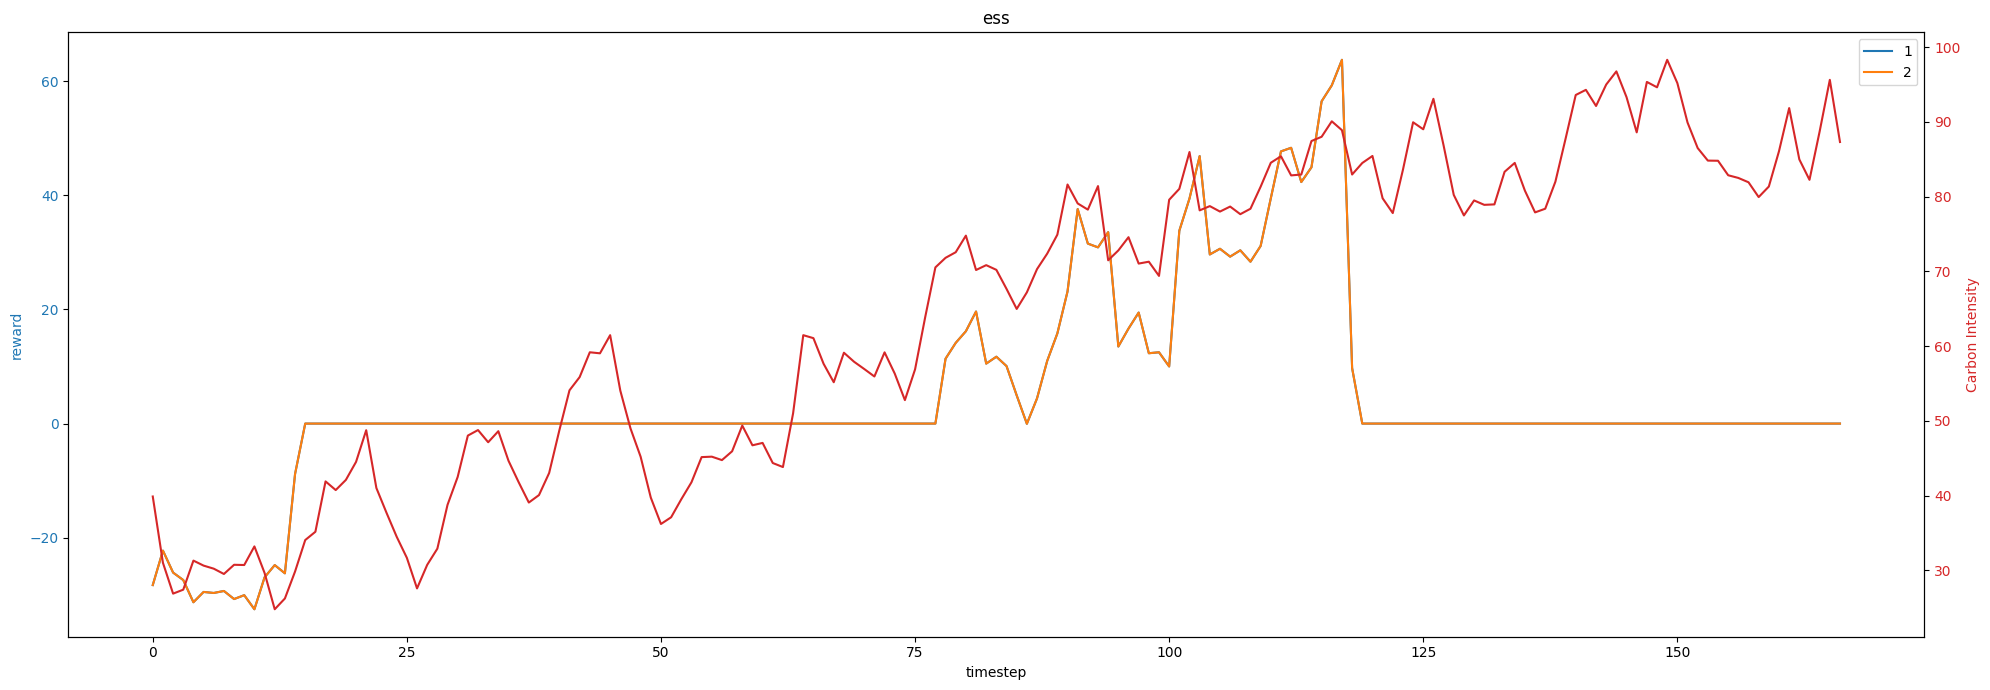

In [120]:
reward_comparison(data_dict["mirror"], data_dict["mirror"], [-1,-1])

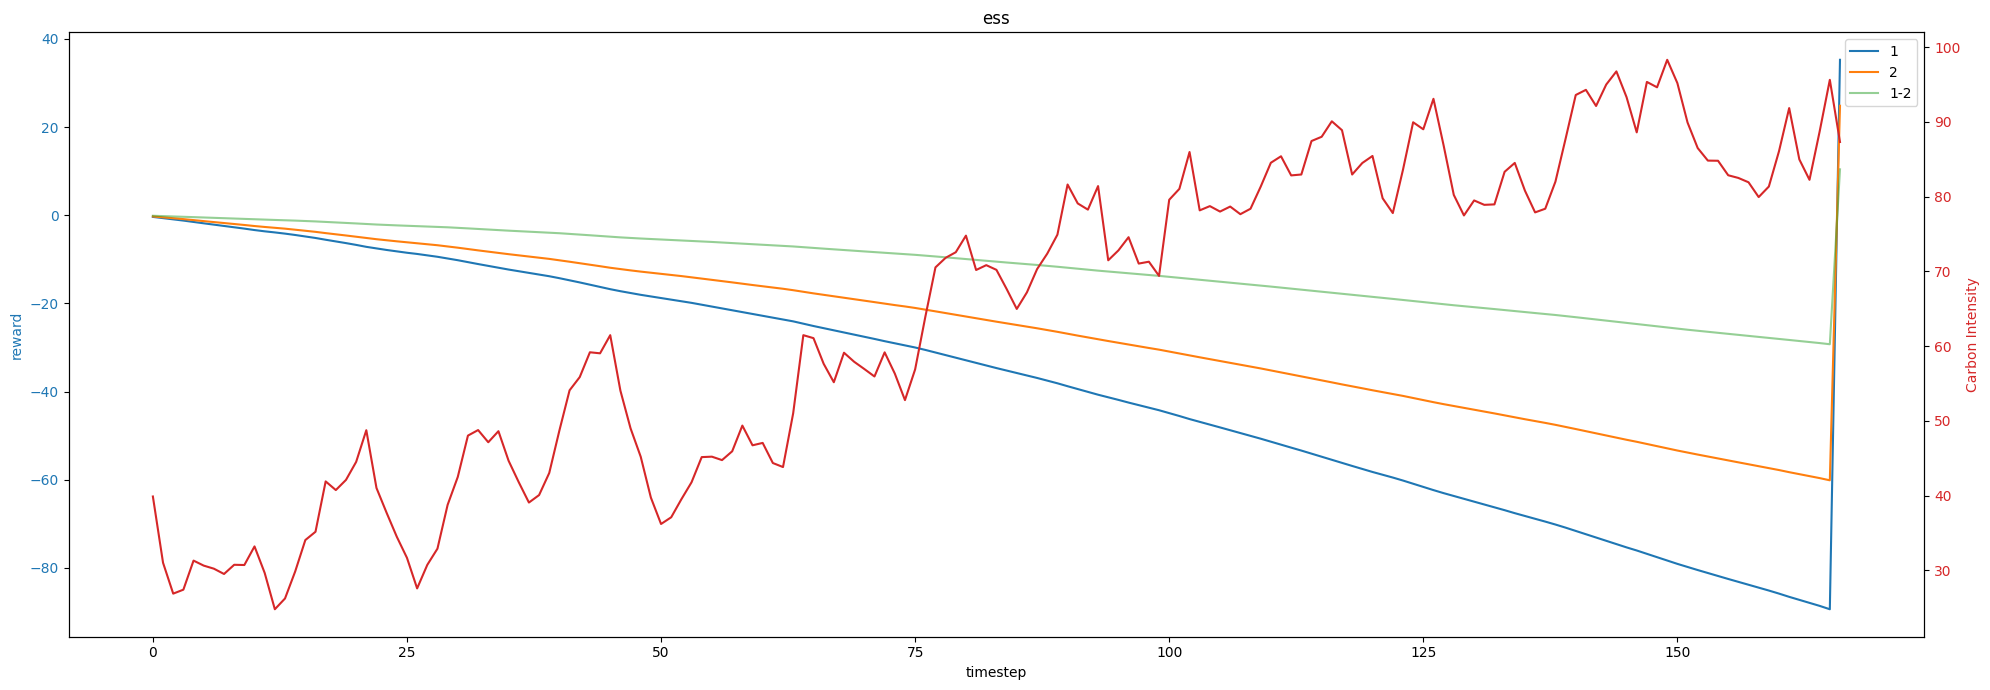

In [94]:
reward_comparison(data_dict["sac_test"], data_dict["sac_test"], [-1, -1], [True, True, True], True)

In [60]:
model = PPO.load("./models/ess/ppo_test/best_model.zip")

In [67]:
model.policy_class

stable_baselines3.common.policies.MultiInputActorCriticPolicy

In [85]:
# Assuming your observation space is a dictionary with two tensors 'carbon_intensity' and 'energy_storage_system_charge'
obs_space_dict = {
    'carbon_intensity': torch.Tensor([0.5]).unsqueeze(0).to(model.device),
    'energy_storage_system_charge': torch.Tensor([0.0]).unsqueeze(0).to(model.device)
}

# Call the get_distribution method with the dictionary of tensors
distribution = model.policy.get_distribution(obs_space_dict)

In [86]:
print(distribution.mean_actions)

None


In [79]:
# Assuming distribution is the output of model.policy.get_distribution(obs_space_dict)
probs = distribution.probs.detach().cpu().numpy()

plt.plot(probs)
plt.title('Distribution Probabilities')
plt.xlabel('Index')
plt.ylabel('Probability')
plt.show()

AttributeError: 'DiagGaussianDistribution' object has no attribute 'probs'

In [80]:
model.policy.log_std

Parameter containing:
tensor([0.], device='cuda:0', requires_grad=True)

In [81]:
model.policy.log_std_init

0.0

In [71]:
model.policy.get_distribution({"carbon_intensity": torch.Tensor([0.0512]), "energy_storage_system_charge": torch.Tensor([0.0])})

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [66]:
obs_space_dict = {
    'carbon_intensity': np.linspace(60*0.0512, 2.373*60, 100).reshape(-1, 1),
    'energy_storage_system_charge': np.linspace(0, 13.5, 100).reshape(-1, 1)
}

# Iterate over the keys in the dictionary and plot the value function for each box
# Iterate over the keys in the dictionary and plot the value function for each box
for key in obs_space_dict.keys():
    obs_space = obs_space_dict[key]
    obs_space_tensor = torch.from_numpy(obs_space).float().to(model.device)
    values = model.policy.value_net(obs_space_tensor).detach().cpu().numpy()  # Move tensor back to CPU for plotting
    plt.plot(obs_space, values, label=key)

plt.xlabel('Observation')
plt.ylabel('Value')
plt.legend()
plt.show()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (100x1 and 64x1)